### Project Nueral Network and Deep Learning

---

- DOMAIN: Electronics and Telecommunication

- CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

- DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

- PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.

*** 1. Data import and Understanding  ***

***Q1 A. Read the ‘Signals.csv’ as DataFrame and import required libraries ***

***Ans 1A***

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random
random.seed(0)

In [3]:
# read the Singals.csv and load it into a dataframe
signalDF = pd.read_csv('Project_NN_DL\Signals.csv')

In [4]:
signalDF.head()


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



***Q 1B. Check for missing values and print percentage for each attribute***

***Ans 1B***


In [5]:
signalDF.value_counts().isnull().sum()


0

In [6]:
# Calculate the null values

null_val_series = ((signalDF.isnull() | signalDF.isna()).sum() * 100 / signalDF.index.size).round(2)
print('Feature            %')
null_val_series

Feature            %


Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


***Q 1C. Check for presence of duplicate records in the dataset and impute with appropriate method.***

***Ans 1C***


In [7]:
# Find duplicate rows in the datframe
dupRows = signalDF[signalDF.duplicated(keep='first')]
dupRows

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [8]:
signalDFUniq = signalDF.drop_duplicates(keep='first')

In [9]:
signalDFUniq.shape

(1359, 12)


***Q 1D. Visualise distribution of the target variable.***

***Ans 1D***


In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

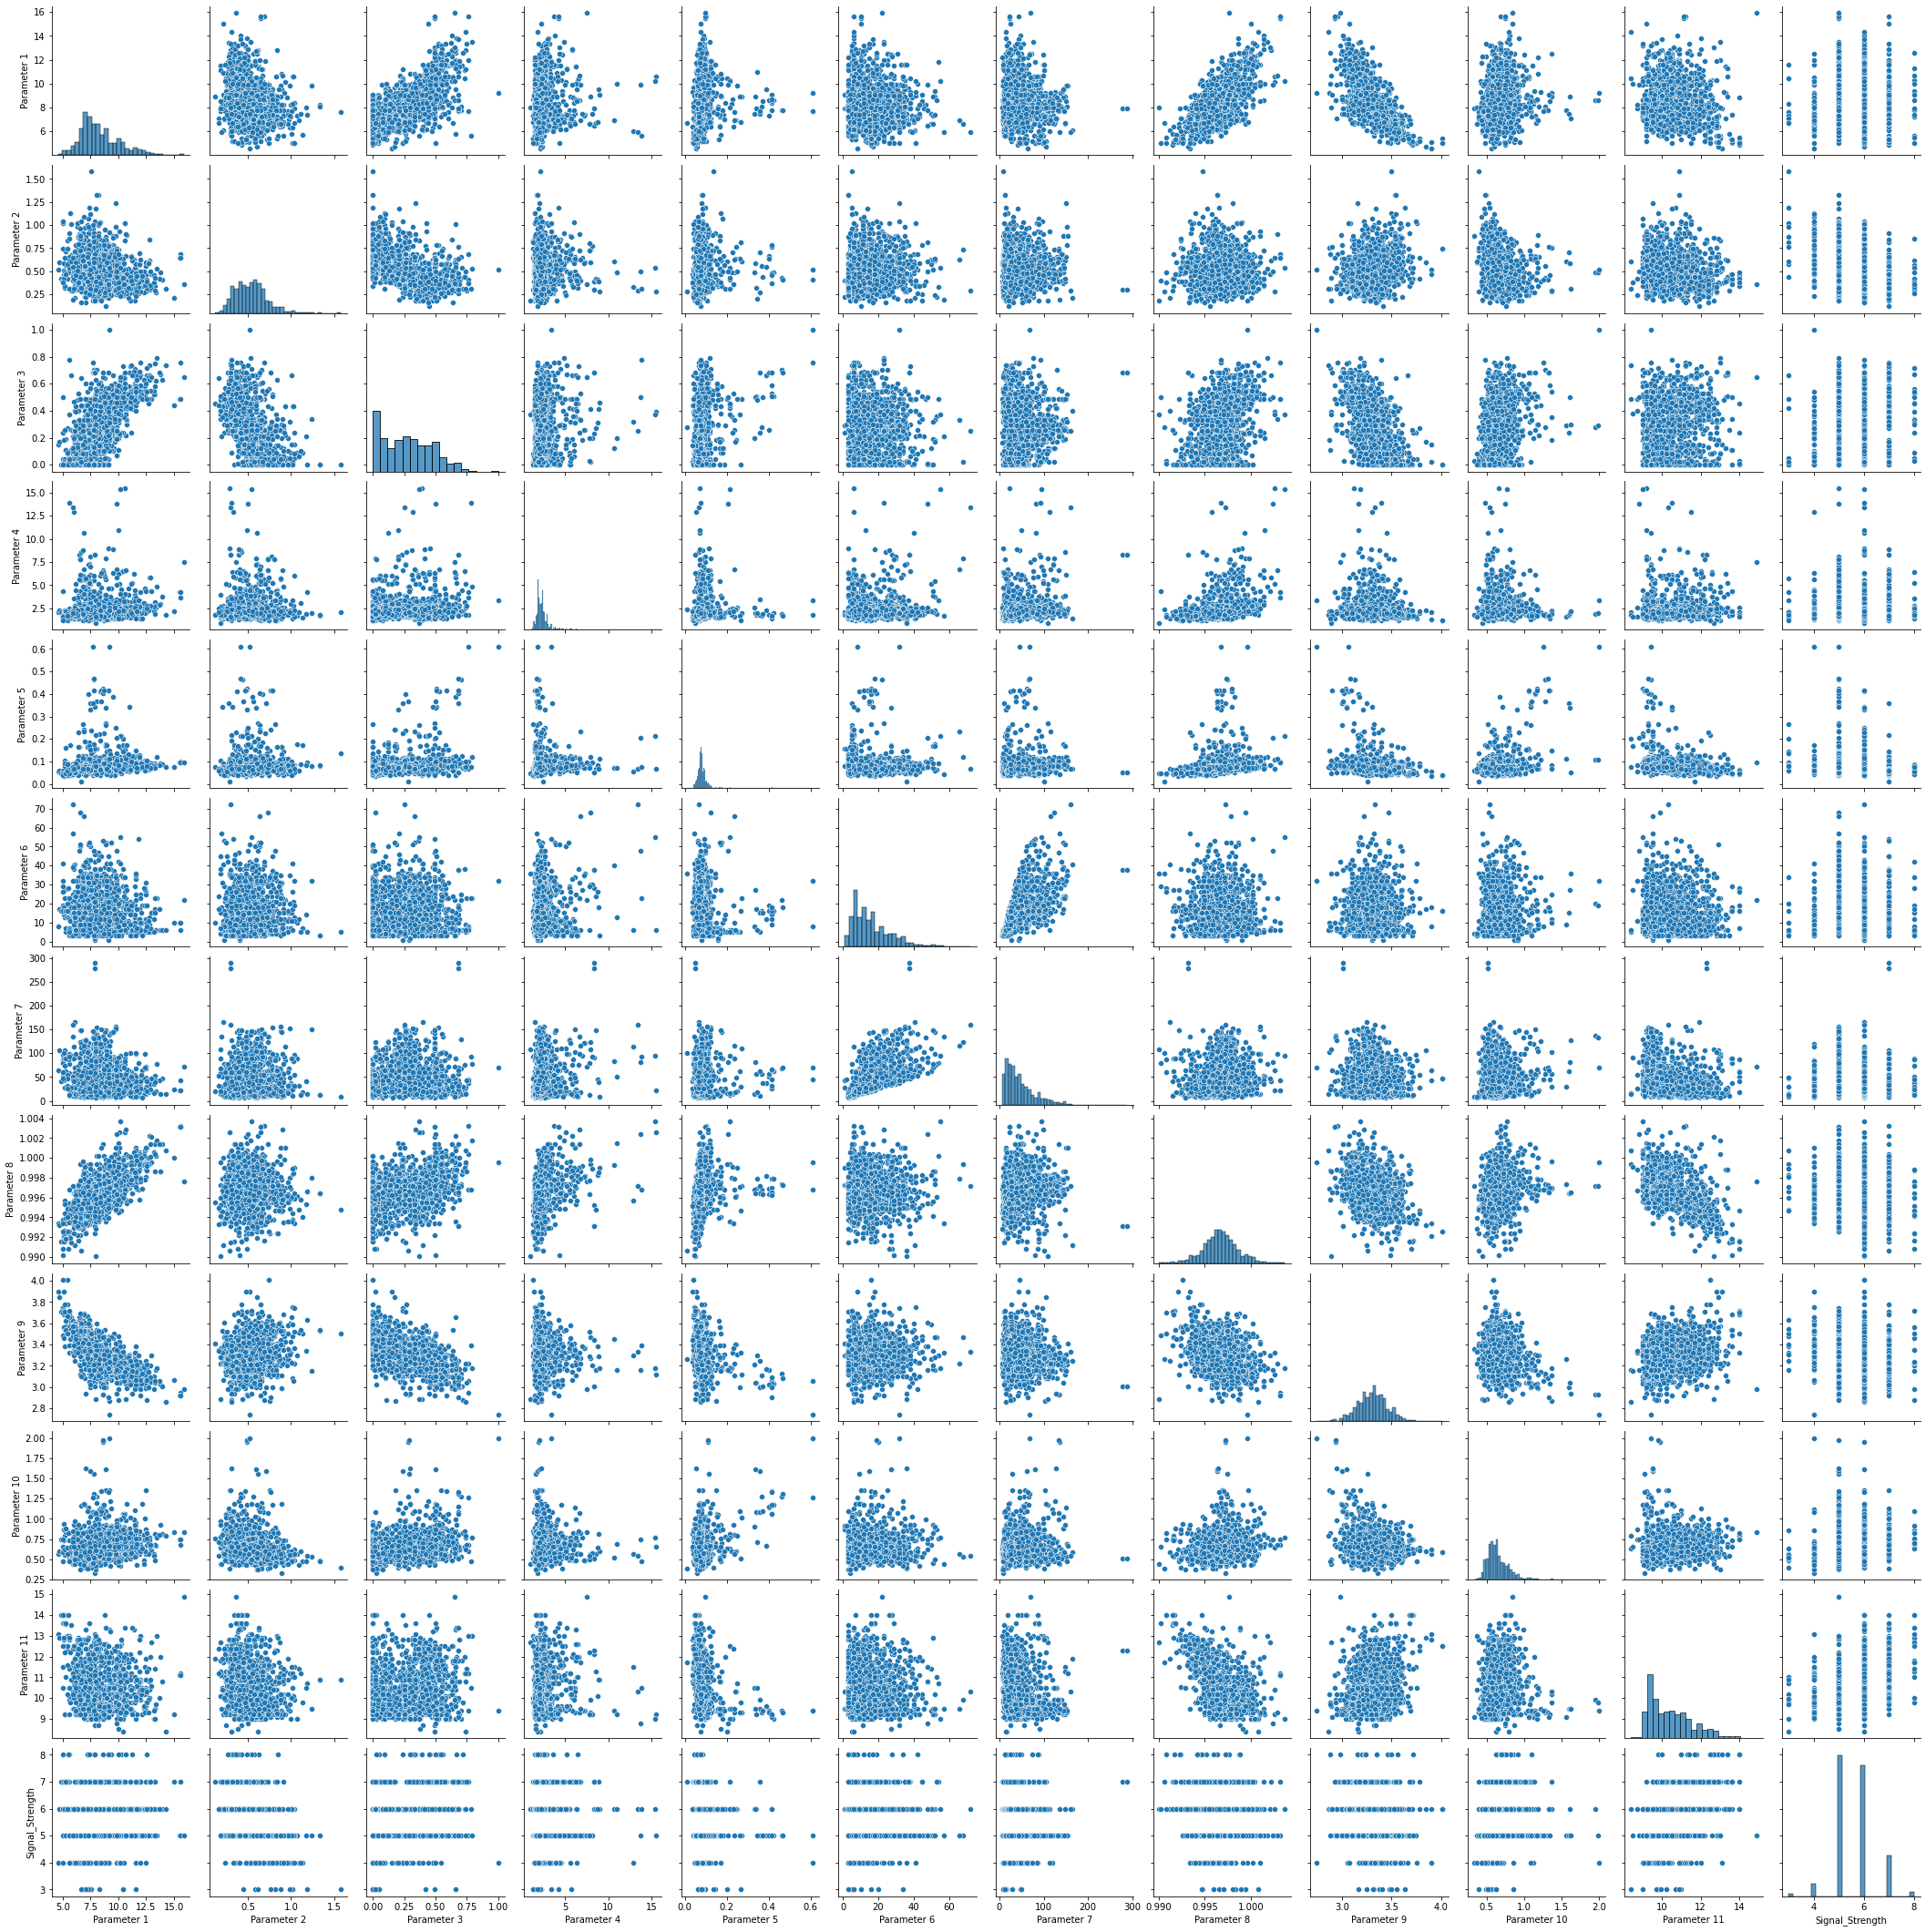

In [11]:
sns.pairplot(signalDFUniq)


***Q 1E Share insights from the initial data analysis (at least 2).***

***Ans 1E***



***Observation***

- The Target variable has 6 classification 
- Parameter 1  and Parameter 3 are postively co-related
- Parameter 1  and Parameter 8 are postively co-related
- Parameter 1  and Parameter 9 are negatively co-related


*** 2. Data preprocessing  ***

***Q 2A. Split the data into X & Y***

***Ans 2A***

In [12]:
#Split the dataframe columns , 'Signal_Strength ' will be split as Y and rest of the features will be X
X = signalDFUniq.loc[:, signalDFUniq.columns != 'Signal_Strength']
Y = signalDFUniq['Signal_Strength']


***Q 2B. Split the data into train & test with 70:30 proportion***
    
***Ans 2B.***
    

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=5 )


***Q 2C. Print shape of all the 4 variables and verify if train and test data is in sync***

***Ans 2C***


In [15]:
print( 'X training data  : ', X_train.shape )
print( 'X test data      : ', X_test.shape )
print( 'Y training data  : ', y_train.shape )
print( 'Y test data      : ', y_test.shape )

X training data  :  (951, 11)
X test data      :  (408, 11)
Y training data  :  (951,)
Y test data      :  (408,)



***Q 2D. Normalise the train and test data with appropriate method.***

***Ans 2D***


In [16]:
# As the features have different units across , use Normalization with MinMaxScaler to level the data
from sklearn.preprocessing import MinMaxScaler


In [17]:
X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
791,8.8,0.640,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.6
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
1538,6.2,0.640,0.09,2.5,0.081,15.0,26.0,0.99538,3.57,0.63,12.0
540,9.2,0.590,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2
...,...,...,...,...,...,...,...,...,...,...,...
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
1169,7.6,0.500,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.5
231,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9


In [18]:
Nrmlzr = MinMaxScaler()
nrmld_trn_data = Nrmlzr.fit_transform(X_train)
X_train_norm   = pd.DataFrame(nrmld_trn_data, columns=X_train.columns)
#X_test_norm = Nrmlzr.fit_transform(X_test)

In [19]:
X_train_norm.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,0.371681,0.429752,0.17,0.118881,0.078671,0.338028,0.438163,0.613846,0.385827,0.125749,0.184615
1,0.221239,0.623967,0.05,0.314685,0.075175,0.028169,0.028269,0.606154,0.519685,0.113772,0.276923
2,0.141593,0.429752,0.09,0.090909,0.073427,0.197183,0.070671,0.398462,0.653543,0.179641,0.553846
3,0.407080,0.388430,0.24,0.146853,0.108392,0.267606,0.144876,0.661538,0.409449,0.203593,0.184615
4,0.539823,0.231405,0.37,0.048951,0.073427,0.225352,0.081272,0.503077,0.299213,0.191617,0.430769


In [20]:
nrmld_trn_data = Nrmlzr.fit_transform(X_test)
X_test_norm   = pd.DataFrame(nrmld_trn_data, columns=X_test.columns)

In [21]:
X_test_norm.head(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,0.275862,0.128571,0.453333,0.062069,0.153659,0.288462,0.214765,0.237151,0.495146,0.316770,0.92
1,0.310345,0.300000,0.080000,0.075862,0.163415,0.307692,0.234899,0.506608,0.504854,0.155280,0.22
2,0.402299,0.200000,0.413333,0.093103,0.160976,0.557692,0.348993,0.582232,0.446602,0.105590,0.16
3,0.586207,0.192857,0.306667,0.068966,0.170732,0.134615,0.080537,0.563142,0.339806,0.173913,0.06
4,0.781609,0.107143,0.653333,0.172414,0.197561,0.980769,0.496644,0.743759,0.417476,0.242236,0.34



***Q 2E. Transform Labels into format acceptable by Neural Network***

***Ans 2E.***


In [22]:
y_train.value_counts()

5    419
6    354
7    117
4     41
8     11
3      9
Name: Signal_Strength, dtype: int64

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
#Convert the target train and test variables to categorical for NN to accept them
y_train_cat = to_categorical( y_train )
y_test_cat  = to_categorical( y_test )

In [25]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(951, 9)
(408, 9)


In [26]:
print(y_train[:5])

791     5
1478    3
1538    5
540     5
1123    6
Name: Signal_Strength, dtype: int64


*** 3. Model Training & Evaluation using Neural Network ***

***Q 3A. Design a Neural Network to train a classifier.***

***Ans 3A.***


In [27]:
#import the tensorflow packages
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout


In [28]:
# define the model
model = tf.keras.Sequential()

model.add( InputLayer( input_shape=11 ) )
model.add( Dense( 64, activation='relu') )
model.add( Dense( 64, activation='relu' ) )
model.add( Dense( 64, activation='relu' ) )
model.add( Dense( 32, activation='relu' ) )

model.add( Dense( 9, activation='softmax') )


***Q 3B. Train the classifier using previously designed Architecture***

***Ans 3B.***


In [29]:
model.compile( loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy'])

In [30]:
# train the model by fitting the training data
history=model.fit(X_train_norm, y_train_cat, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 8ms/step - loss: 0.1981 - accuracy: 0.0658 - val_loss: 0.1979 - val_accuracy: 0.1047
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.1039 - val_loss: 0.1979 - val_accuracy: 0.1466
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.1276 - val_loss: 0.1978 - val_accuracy: 0.1780
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.1539 - val_loss: 0.1978 - val_accuracy: 0.1937
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.1816 - val_loss: 0.1977 - val_accuracy: 0.2251
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.2013 - val_loss: 0.1976 - val_accuracy: 0.2670
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.2250 - val_loss: 0.1976 - val_accuracy: 0.3089
Epoch 8/20
24/24 [==

In [31]:
results = model.evaluate( X_test_norm, y_test_cat )

13/13 [==============================] - 0s 831us/step - loss: 0.1968 - accuracy: 0.4412



***Q 3 C. Plot 2 separate visuals.***

- i. Training Loss and Validation Loss
- ii. Training Accuracy and Validation Accuracy

***Ans 3C.***

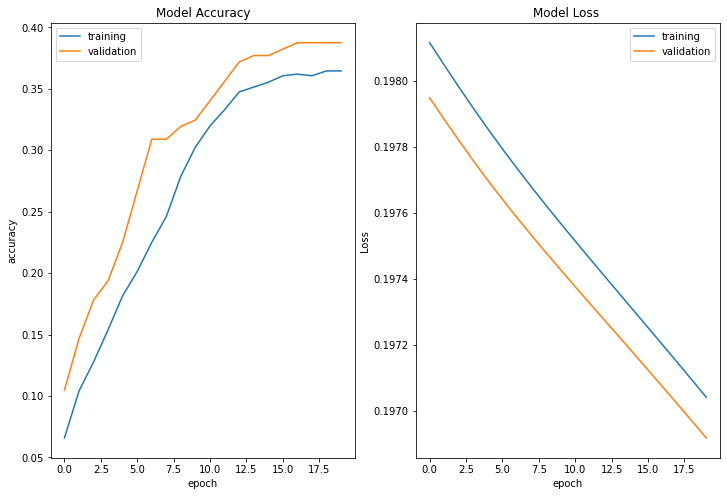

In [32]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss ')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='best')

plt.show()


***Q 3D. Design new architecture/update existing architecture in attempt to improve the performance of the model***

***Ans 3D.***



In [33]:
# define the model
model1 = tf.keras.Sequential()

model1.add( InputLayer( input_shape=11 ) )
model1.add( Dense( 64, activation='relu') )
model1.add( BatchNormalization() )
model1.add( Dense( 64, activation='relu' ) )
model1.add( BatchNormalization() )
model1.add( Dense( 64, activation='relu' ) )
model1.add( BatchNormalization() )
model1.add( Dense( 64, activation='relu' ) )

#model1.add( BatchNormalization() )
# use 40% dropout
#model1.add(  Dropout(0.5) ) 
model1.add( Dense( 9, activation='softmax') )

In [34]:
model1.compile( loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [35]:
# train the model by fitting the training data
history1=model1.fit(X_train_norm, y_train_cat, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 8ms/step - loss: 2.2764 - accuracy: 0.2513 - val_loss: 2.2077 - val_accuracy: 0.0471
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 2.0641 - accuracy: 0.3329 - val_loss: 2.1976 - val_accuracy: 0.1623
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1.9207 - accuracy: 0.3921 - val_loss: 2.1571 - val_accuracy: 0.3717
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 1.7785 - accuracy: 0.4408 - val_loss: 2.1000 - val_accuracy: 0.4084
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 1.6746 - accuracy: 0.4776 - val_loss: 2.0287 - val_accuracy: 0.4188
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 1.5971 - accuracy: 0.5026 - val_loss: 1.9577 - val_accuracy: 0.4241
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 1.5132 - accuracy: 0.5211 - val_loss: 1.8811 - val_accuracy: 0.4136
Epoch 8/20
24/24 [==

In [36]:
results1 = model1.evaluate( X_test_norm, y_test_cat )

13/13 [==============================] - 0s 831us/step - loss: 1.2351 - accuracy: 0.5662



***Q 3E. Plot visuals as in Q3.C and share insights about difference observed in both the models.***

***Ans 3E. ***


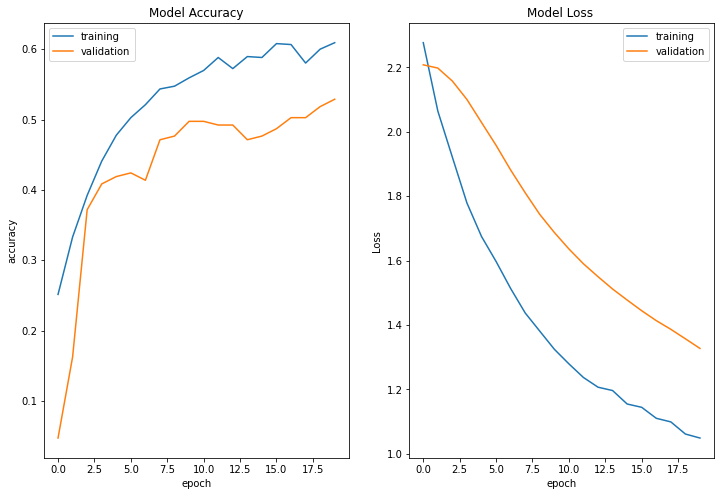

In [37]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss ')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='best')

plt.show()

***Observations***
The Accuracy is increased when
- Decreasing the learning rate 
- Chaning the loss function from 'mean_absolute_error to categorical_crossentropy
- changing the optimizer from 'Stochastic gradient descent' to 'Adam' 
- Introducing the Batch normalization

- But Dropout reduced the accuracy.

---
### PARTB

 DOMAIN: Autonomous Vehicles
 
• CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively

*** 1. Data Import and Exploration ***

***Q 1A. Read the .h5 file and assign to a variable***

***Ans 1A.***

In [38]:
#import h5py library
import h5py

In [39]:
#Read the file
h5Fil = h5py.File('Project_NN_DL\Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

***Q 1B. Print all the keys from the .h5 file***

***Ans 1B***

In [40]:
# check the datasets in the file
h5Fil.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

***Q 1C. Split the data into X_train, X_test, Y_train, Y_test***

***Ans 1C***

In [41]:
#Retrieve the datasets based on keys
X_train2 =  h5Fil.get('X_train')
X_test2 =  h5Fil.get('X_test')
y_train2 =  h5Fil.get('y_train')
y_test2 =  h5Fil.get('y_test')

X_val2 =  h5Fil.get('X_val')
y_val2 =  h5Fil.get('y_val')


*** 2 Data Visualisation and preprocessing ***

***Q 2A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.***

***Ans 2A.***

In [42]:
#Print the size or shape of datasets
print('X_train shape: ', X_train2.shape)
print('X_test shape : ',  X_test2.shape)
print('y_train shape: ', y_train2.shape)
print('y_test shape : ',  y_test2.shape)

X_train shape:  (42000, 32, 32)
X_test shape :  (18000, 32, 32)
y_train shape:  (42000,)
y_test shape :  (18000,)


The datasets are in sync
- The Train datsets have 42000 rows
- The test datsets have 18000 rows
- X_train2 and X_test2 has the same 2nd and 3rd dimesnsion value counts


***Q 2B. Visualise first 10 images in train data and print its corresponding labels.***

***Ans 2B.***


In [43]:
import matplotlib.pyplot as plt

Labels


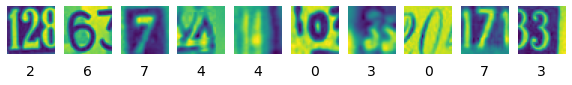

In [44]:
# Plot the first 10 images from the pixel data
plt.figure(figsize=(10,1))

for imgiter in range(10):
    plt.subplot(1, 10, imgiter+1)
    plt.imshow(X_train2[ imgiter ])
    plt.axis('off')
print('Labels')    

# Print the labels in the subplot to match the image
for imgiter in range(10):    
    subplt = plt.subplot(1, 10, imgiter+1)
    subplt.text(0.5,-0.45, y_train2[ imgiter], size=14, ha="center", transform=subplt.transAxes)
    plt.axis('off')
plt.show() 




***Q 2C. C. Reshape all the images with appropriate shape update the data in same variable***

***Ans 2C.***


In [45]:
# Convert HDF5 datasets to arrays
X_train2 = np.array(X_train2)
y_train2 = np.array(y_train2)
X_test2  = np.array(X_test2)
y_test2  = np.array(y_test2)

X_val2 =  np.array(X_val2)
y_val2 =  np.array(y_val2)

In [46]:
#Reshape the arrays from 3 dimesnion to 2 dimension
X_train2 = X_train2.reshape((X_train2.shape[0], 1024))
X_test2 = X_test2.reshape((X_test2.shape[0], 1024))
X_val2 = X_val2.reshape((X_val2.shape[0], 1024))
print(X_train2.shape)
print(X_test2.shape)
print(X_val2.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


In [47]:
# close the opened file to release the handle
h5Fil.close()


***Q 2D. Normalise the images i.e. Normalise the pixel values.***

***Ans 2D.***


In [48]:
# convert the features / pixels value to a float data type for better normalization
X_train2 = X_train2.astype('float32')
X_test2  = X_test2.astype('float32')
X_val2   = X_val2.astype('float32')

# the pixels are ranging from 0 to 255,  divide by 255 to normalize them to range from 0 to 1
X_train2 = X_train2 / 255.0
X_test2  = X_test2 / 255.0
X_val2   = X_val2/ 255.0


***Q 2E. Transform Labels into format acceptable by Neural Network***

***Ans 2E***


In [49]:
#Convert the target train and test variables to categorical for NN to accept them
y_train2 = to_categorical( y_train2 )
y_test2  = to_categorical( y_test2 )
y_val2  = to_categorical( y_val2 )
print(y_train2.shape)
print(y_test2.shape)
print(y_val2.shape)

(42000, 10)
(18000, 10)
(60000, 10)



***Q 2F. Print total Number of classes in the Dataset.***

***Ans 2F.***


In [50]:
print('Total number of classes in Training features dataset : ', X_train2.shape[1])
print('Total number of classes in Training target dataset   : ', y_train2.shape[1])

Total number of classes in Training features dataset :  1024
Total number of classes in Training target dataset   :  10



*** 3. Model Training & Evaluation using Neural Network ***

***Q 3A. Design a Neural Network to train a classifier. ***

***Ans 3A***



In [51]:
# define the model
model2 = tf.keras.Sequential()

imageSiz = 32 * 32
model2.add( Dense( 256, activation='relu', input_shape =( imageSiz, ) ) )
model2.add( Dense( 64, activation='relu' ) )
model2.add( Dense( 64, activation='relu' ) )
model2.add( Dense( 32, activation='relu' ) )

model2.add( Dense( 10, activation='softmax') )

In [52]:
# Configure the model
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [53]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               262400    
                                                                 
 dense_11 (Dense)            (None, 64)                16448     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


In [54]:
# train the model by fitting the training data
history2=model2.fit(X_train2, y_train2, epochs=20, batch_size=64, verbose=2, validation_data=(X_val2, y_val2))

Epoch 1/20
657/657 - 3s - loss: 2.3032 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000 - 3s/epoch - 4ms/step
Epoch 2/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 3/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 4/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 5/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 6/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 7/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 8/20
657/657 - 2s - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000 - 2s/epoch - 3ms/step
Epoch 9/20
657/657 - 2s 

In [55]:
#Predict the model
y_pred2 = model2.predict(X_test2)



563/563 [==============================] - 1s 883us/step


In [56]:
y_pred2[0]

array([0.09883256, 0.09830031, 0.10029367, 0.10243969, 0.10037196,
       0.10129594, 0.09928935, 0.10027172, 0.0994555 , 0.09944926],
      dtype=float32)

In [57]:
y_pred2_final=[]
for i in y_pred2:
    y_pred2_final.append( np.argmax(i))
    
    

In [58]:
y_pred2_final[0]

3

In [59]:
print('Predicted Value : ', y_pred2[0:5].round().tolist() )
print('Actual Value : ', y_test2[0:5].round().tolist() )

Predicted Value :  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Actual Value :  [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]



***Q 3B. Train the classifier using previously designed Architecture (Use best suitable parameters)***

***Ans 3B.***


In [60]:
# define the model and use Dropout 50% and batch normalization
model3 = tf.keras.Sequential()

model3.add( Dense( 256, activation='relu', input_shape =( imageSiz, ) ) )
model3.add( BatchNormalization() )
model3.add( Dense( 64, activation='relu' ) )
model3.add( BatchNormalization() )
model3.add( Dense( 64, activation='relu' ) )
model3.add( BatchNormalization() )
model3.add( Dense( 32, activation='relu' ) )

#model3.add( BatchNormalization() )
# use 50% dropout
#model3.add(  Dropout(0.5) ) 
    
model3.add( Dense( 10, activation='softmax') )

In [61]:
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [62]:
# train the model by fitting the training data
history3=model3.fit(X_train2, y_train2, validation_split=0.1, epochs=20, batch_size=64, verbose=2, validation_data=(X_test2, y_test2))

Epoch 1/20
657/657 - 2s - loss: 2.0430 - accuracy: 0.2850 - val_loss: 1.8073 - val_accuracy: 0.3976 - 2s/epoch - 4ms/step
Epoch 2/20
657/657 - 2s - loss: 1.4565 - accuracy: 0.5424 - val_loss: 1.4739 - val_accuracy: 0.5186 - 2s/epoch - 3ms/step
Epoch 3/20
657/657 - 2s - loss: 1.2107 - accuracy: 0.6312 - val_loss: 1.1946 - val_accuracy: 0.6244 - 2s/epoch - 3ms/step
Epoch 4/20
657/657 - 2s - loss: 1.0730 - accuracy: 0.6714 - val_loss: 1.1219 - val_accuracy: 0.6581 - 2s/epoch - 3ms/step
Epoch 5/20
657/657 - 2s - loss: 0.9974 - accuracy: 0.6946 - val_loss: 1.2037 - val_accuracy: 0.6113 - 2s/epoch - 3ms/step
Epoch 6/20
657/657 - 2s - loss: 0.9449 - accuracy: 0.7092 - val_loss: 1.0522 - val_accuracy: 0.6725 - 2s/epoch - 3ms/step
Epoch 7/20
657/657 - 2s - loss: 0.8900 - accuracy: 0.7243 - val_loss: 0.9979 - val_accuracy: 0.6836 - 2s/epoch - 3ms/step
Epoch 8/20
657/657 - 2s - loss: 0.8639 - accuracy: 0.7308 - val_loss: 0.9917 - val_accuracy: 0.6897 - 2s/epoch - 3ms/step
Epoch 9/20
657/657 - 2s 

In [63]:
#Predict the model
y_test2_arg=np.argmax(y_test2,axis=1)
y_pred3 = model3.predict(X_test2)

563/563 [==============================] - 1s 1ms/step


In [64]:
print('Predicted Value : ', y_pred3[0:5].round().tolist() )
print('Actual Value : ', y_test2[0:5].round().tolist() )

Predicted Value :  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
Actual Value :  [[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [65]:
y_pred3_final=[]
for i in y_pred3:
    y_pred3_final.append( np.argmax(i))


***Q 3C. Evaluate performance of the model with appropriate metrics***

***Ans 3C. ***


In [66]:
# Model without Batch Normalization and Dropouts
print(classification_report(y_test2_arg, y_pred2_final))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2_arg, y_pred2_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.10      1.00      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000

[[   0    0    0 1814    0    0    0    0    0    0]
 [   0    0    0 1828    0    0    0    0    0    0]
 [   0    0    0 1803    0    0    0    0    0    0]
 [   0    0    0 1719    0    0    0    0    0    0]
 [   0    0    0 1812    0   

In [67]:
# Model with Batch Normalization and Dropouts
print(classification_report(y_test2_arg, y_pred3_final))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test2_arg, y_pred3_final))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1814
           1       0.84      0.74      0.78      1828
           2       0.82      0.77      0.79      1803
           3       0.80      0.65      0.71      1719
           4       0.83      0.79      0.81      1812
           5       0.78      0.73      0.75      1768
           6       0.81      0.71      0.76      1832
           7       0.86      0.77      0.81      1808
           8       0.61      0.77      0.68      1812
           9       0.62      0.81      0.70      1804

    accuracy                           0.76     18000
   macro avg       0.77      0.76      0.76     18000
weighted avg       0.77      0.76      0.76     18000

[[1503   24   10    9   18    6   20   23   51  150]
 [  71 1348   33   38   88    5   18   50   94   83]
 [  31   19 1384   34   24   17    8   79   76  131]
 [  35   42   55 1110   26  167   22   25  151   86]
 [  65   50   31   12 1426   

- The Accuracy,  Macro avg and weighted average has all improved in the second model after introducing batch normalization 


***Q 3D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your 
observations on the same***

***Ans 3D***


In [68]:
results2 = model2.evaluate(X_test2, y_test2)


563/563 [==============================] - 1s 1ms/step - loss: 2.3028 - accuracy: 0.0955


In [69]:
results3 = model3.evaluate(X_test2, y_test2)

563/563 [==============================] - 1s 1ms/step - loss: 0.7917 - accuracy: 0.7567


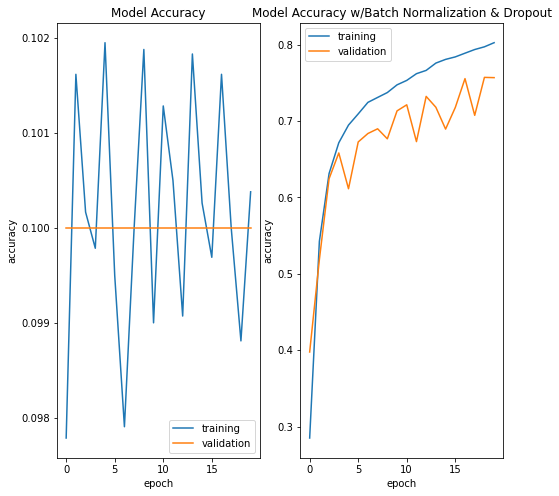

In [70]:
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy w/Batch Normalization & Dropout')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='best')

plt.show()

***Observations***
The Accuracy increased   after 
- decreasing the learning rate 
- Introducing the Batch normalization

- But Dropout reduced the accuracy.